In [11]:
# Import the custom analysis module with forced reload
import importlib
import sys

# Remove from cache if it exists and force reload
if 'leveraged_lp_analysis' in sys.modules:
    del sys.modules['leveraged_lp_analysis']

# Fresh import
from source.leveraged_lp_analysis import LeveragedLPAnalyzer, create_position_config

print(" Module reloaded with breakeven line functionality!")

 Module reloaded with breakeven line functionality!


In [12]:
current_price=4606.0
range_lower=4546.0
range_upper=4684.0
leverage=6
apr=1000.0

--- Leveraged LP Position Analysis ---
Initial Equity: $4,606.00 (1 ETH + $0 USDC)
Leverage: 6x
Total Position Value: $27,636.00
--------------------------------------------------
LP Position at Current Price ($4,606):
  - ETH: 3.367872 ($15,512.42)
  - USDC: $12,123.58
  - Total: $27,636.00
  - Liquidity (L): 27,336.97
--------------------------------------------------
Debt (ETH):
  - Amount: 5.000000 ETH
  - Value: $23,030.00
LP Range: $4,546 - $4,684
--------------------------------------------------
Position Verification at Current Price:
  - LP Value: $27,636.00
  - Final Equity: $4,606.00
  - Expected Equity: $4,606.00
  - ✅ Equity matches expectation
--------------------------------------------------

--- PnL at Key Price Points ---

Lower Band (ETH = $4,546):
  LP Value: $27,354.71
  Final Equity: $4,624.71
  P&L: $18.71 (+0.41%)
  Impermanent Loss: $78.71

Current Price (ETH = $4,606):
  LP Value: $27,636.00
  Final Equity: $4,606.00
  P&L: $-0.00 (-0.00%)
  Impermanent Loss: 

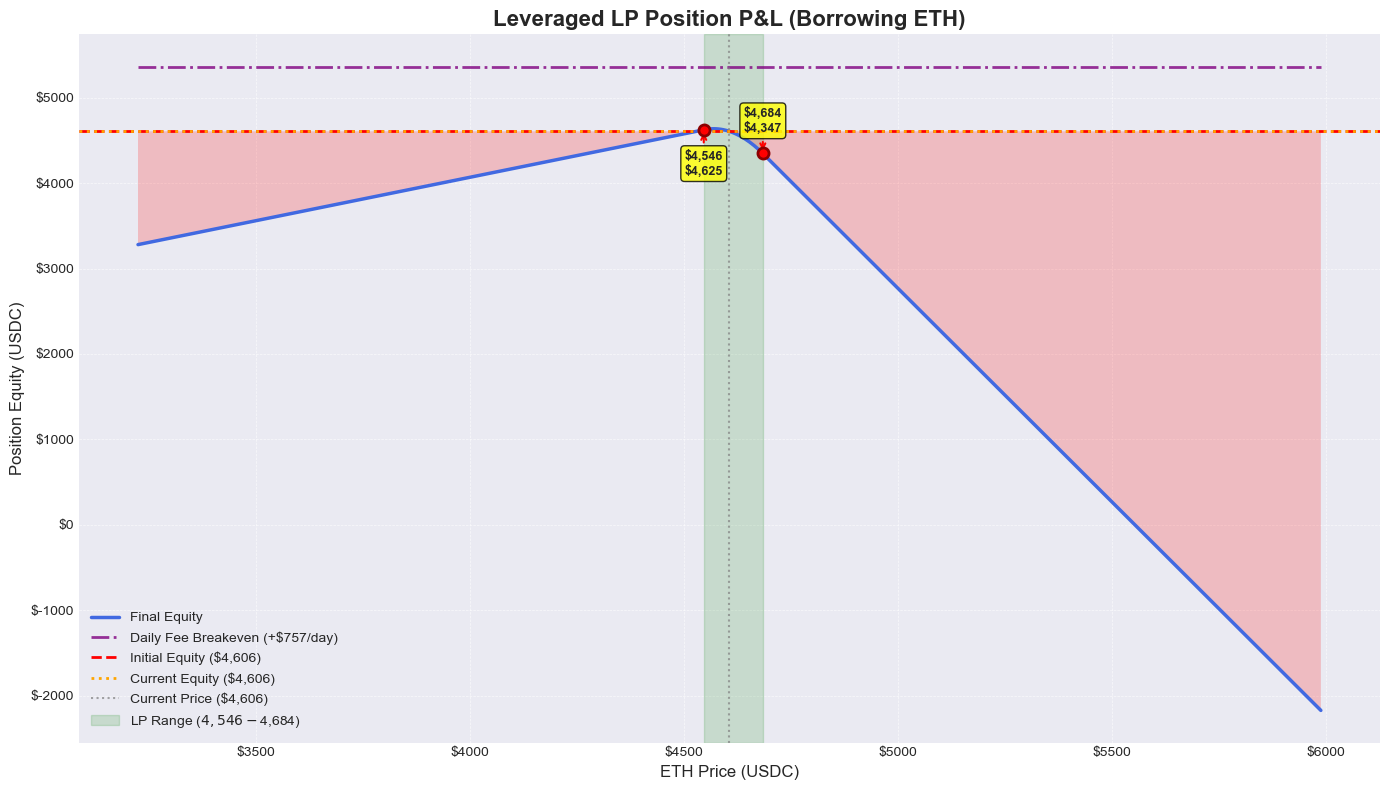

In [13]:
# =============================================================================
# SCENARIO 1: ETH POSITION ANALYSIS
# =============================================================================

# Initialize the analyzer
analyzer = LeveragedLPAnalyzer()

# Configure ETH position parameters
eth_config = create_position_config(
    current_price=current_price,
    range_lower=range_lower,
    range_upper=range_upper,
    initial_eth=1,
    initial_usdc=0,
    leverage=leverage,
    borrow_type='ETH',
    apr_percent=apr
)

# Run analysis and display results
eth_results = analyzer.calculate_position_analysis(eth_config)

if eth_results:
    analyzer.print_analysis_summary(eth_config, eth_results)
    analyzer.plot_individual_position(eth_config, eth_results)

--- Leveraged LP Position Analysis ---
Initial Equity: $4,606.00 (0 ETH + $4606.0 USDC)
Leverage: 4x
Total Position Value: $18,424.00
--------------------------------------------------
LP Position at Current Price ($4,606):
  - ETH: 1.292132 ($5,951.56)
  - USDC: $12,472.44
  - Total: $18,424.00
  - Liquidity (L): 10,488.22
--------------------------------------------------
Debt (USDC):
  - Amount: $13,818.00 USDC
LP Range: $4,446 - $4,684
--------------------------------------------------
Position Verification at Current Price:
  - LP Value: $18,424.00
  - Final Equity: $4,606.00
  - Expected Equity: $4,606.00
  - ✅ Equity matches expectation
--------------------------------------------------

--- PnL at Key Price Points ---

Lower Band (ETH = $4,446):
  LP Value: $17,998.71
  Final Equity: $4,180.71
  P&L: $-425.29 (-9.23%)
  Impermanent Loss: $-425.29

Current Price (ETH = $4,606):
  LP Value: $18,424.00
  Final Equity: $4,606.00
  P&L: $-0.00 (-0.00%)
  Impermanent Loss: $-0.00

Up

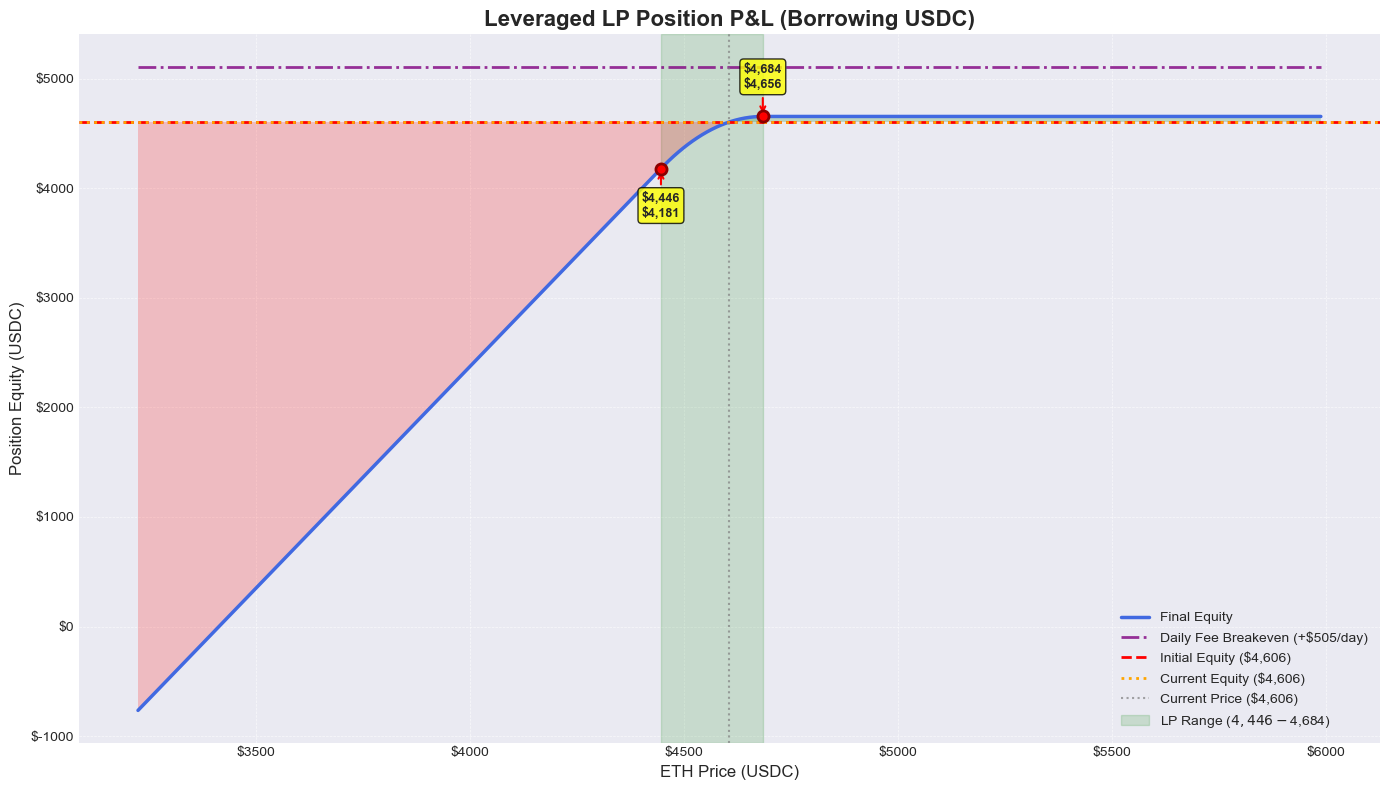

In [14]:
# =============================================================================
# SCENARIO 2: USDC POSITION ANALYSIS
# =============================================================================

# Configure USDC position parameters
usdc_config = create_position_config(
    current_price=current_price,
    range_lower=range_lower-100,
    range_upper=range_upper,
    initial_eth=0,
    initial_usdc=current_price,
    leverage=leverage-2,
    borrow_type='USDC',
    apr_percent=apr
)

# Run analysis and display results
usdc_results = analyzer.calculate_position_analysis(usdc_config)

if usdc_results:
    analyzer.print_analysis_summary(usdc_config, usdc_results)
    analyzer.plot_individual_position(usdc_config, usdc_results)

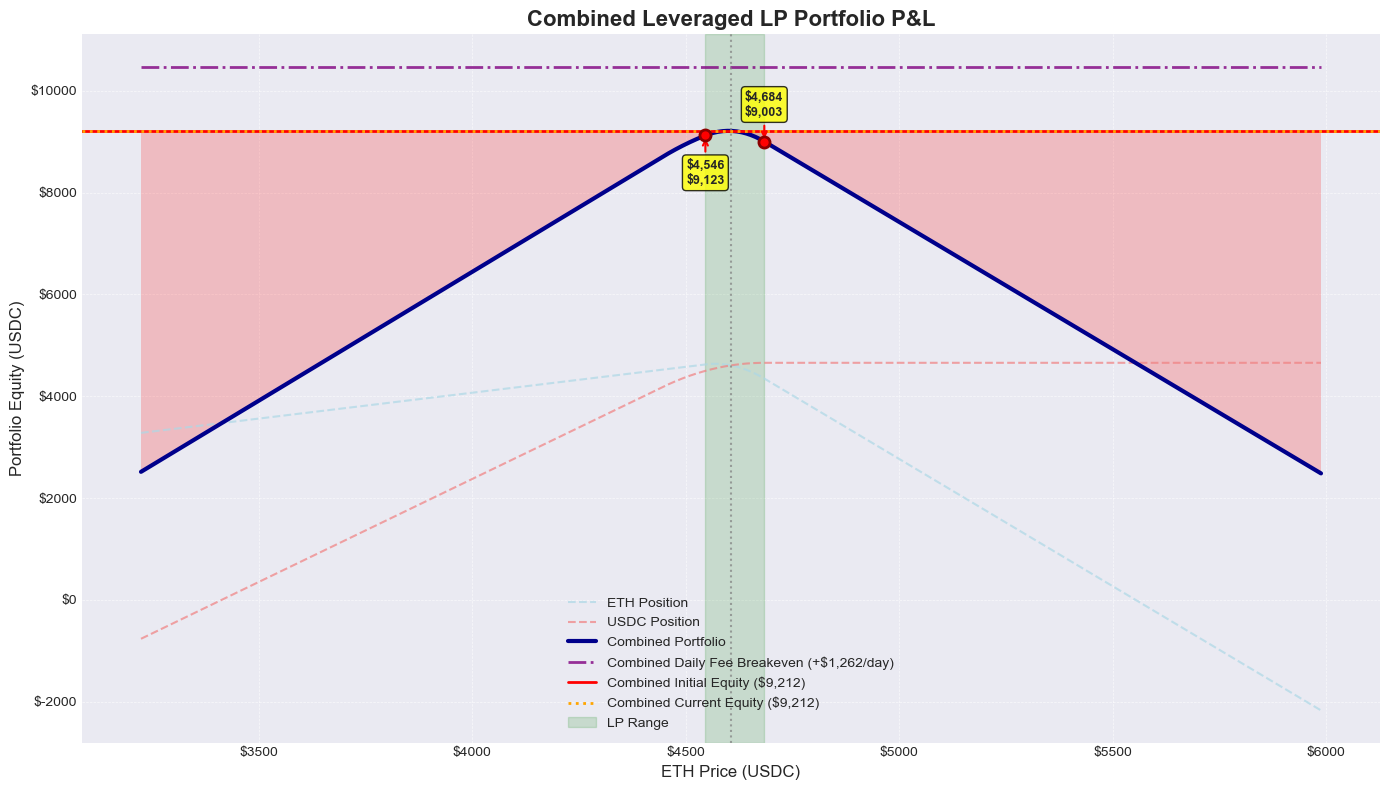

COMBINED PORTFOLIO ANALYSIS
Total Initial Equity: $9,212.00
Total Position Value: $46,060.00
Combined Leverage: 5.0x
------------------------------------------------------------
Position 1: 1 ETH → ETH leverage
Position 2: $4606.0 USDC → USDC leverage
------------------------------------------------------------
Combined Portfolio Scenarios:
  Lower Band   ($4546): $   9,123 ( -0.97%)
  Current      ($4606): $   9,212 ( -0.00%)
  Upper Band   ($4684): $   9,003 ( -2.27%)
  -10%         ($4145): $   7,181 (-22.05%)
  +10%         ($5067): $   7,090 (-23.04%)


In [15]:
# =============================================================================
# SCENARIO 3: COMBINED POSITIONS ANALYSIS
# =============================================================================

# Run combined analysis and visualization
analyzer.plot_combined_positions(eth_config, usdc_config)